# Introduction to the Datasets

![link text](https://ph-files.imgix.net/069dd825-cddf-4048-adde-8e81396c2c68?auto=format)


We will be working with datasets obtained through the [The Movie Database (TMDb) API](https://developers.themoviedb.org/3/getting-started/introduction). The first dataset is part of the MovieLens Latest Full Dataset, comprising 26 million ratings on 45.000 movies from 27.000 users. Let's look at the features in this dataset.

**Features**

* **adult**: Indicates if the movie is X-Rated.
* **belongs_to_collection**: A stringified dictionary with info on the movie series a particular film belongs to (e.g.: Lord of the Rings).
* **budget**: The movie budget in dollars.
* **genres**: A stringified list of dictionaries describing all genres associated with the movie.
* **homepage**: The movie's official homepage.
* **id**: An identifier for the movie.
* **imdb_id**: IMDB's identifier for the movie.
* **original_language**: The language in which the movie was shot.
* **original_title**: The original title of the movie.
* **overview**: A brief text about the movie.
* **popularity**: A Popularity Score given by TMDb.
* **poster_path**: The URL of the poster image.
* **production_companies**: A stringified list of production companies involved with making of the movie.
* **production_countries**: A stringified list of countries in which the movie was produced.
* **release_date**: Release date of the movie in theaters.
* **revenue**: The total revenue of the movie in dollars.
* **runtime**: The runtime of the movie in minutes.
* **spoken_languages**: A stringified list of languages spoken in the film.
* **status**: The status of the movie (Released, To Be Released, etc.)
* **tagline**: The movie's tagline.
* **title**: The official title of the movie.
* **video**: Indicates whether there is a video of the movie in TMDb.
* **vote_average**: The average rating of the movie, on a 0-10 scale.
* **vote_count**: The number of votes by users, as counted by TMDb.

# Imports

First, let's make sure to import Pandas and NumPy. 

In [1]:
import pandas as pd 
import numpy as np
import ast
from ast import literal_eval
from IPython.display import display

# Section 1: Loading, preprocessing and cleaning the data

Read the movie dataset from the following URL.

In [2]:
url = 'http://courses.compute.dtu.dk/02807/2021/projects/project1/movies_metadata.csv'

## Part 1: Reading and preprocessing the data

Pandas infers a data type for raw data from a `.csv`, defaulting to string type when no other `dtype` could be established. For example, the `genres` column in our dataset is read as a string with a *stringified* list of dictionaries as cell content. 

Some preprocessing steps are therefore needed, to convert the columns into their proper data types.

Creating a function `load_movies_data()` that reads the URL into a Pandas DataFrame and preprocesses its columns to ensure that:

1. Data in the `release_date` column consists of Pandas `Timestamp` objects, except for missing values. For example, executing a code cell with `df.release_date[0]` should display the output `Timestamp('1995-10-30 00:00:00')`.

2. Data in `belongs_to_collection` consists of dictionaries, except for missing values.

3. Data in `genres`, `production_companies` and `production_countries` consists of lists of dictionaries, except for missing values. 
 

In [3]:
def load_movies_data(url):
    df = pd.read_csv(url)
    df['release_date']= pd.to_datetime(df['release_date'], errors="coerce")
    df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x: ast.literal_eval(x) if not type(x) == float else x)   

    columns = ['genres', 'production_companies', 'production_countries']
    for column in columns:
      df[column] = df[column].apply(lambda x: ast.literal_eval(x) if not type(x) == float else x)  
    return df


Now calling `load_movies_data()` and load the data into a DataFrame `df`.

In [4]:
df = load_movies_data(url)

/var/folders/g_/cyhpn47s7m1_y4rg035gybmr0000gn/T/ipykernel_53443/1930717159.py:1: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  df = load_movies_data(url)


In [5]:
print(df['release_date'][0])
print(df.genres[0])
print(df.genres[0][0]['name'])

1995-10-30 00:00:00
[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]
Animation


Displaying the DataFrame.

In [6]:
# your code goes here
#Data in genres, production_companies and production_countries consists of lists of dictionaries, except for missing values
df['genres']
df['production_companies']
df['production_countries']
display(df)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaT,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


## Part 2: Timing my function

I want to measure the performance of my function in order to check if it's reliable for deployment.

In [7]:
load_time = %timeit -o -r 3 load_movies_data(url)
print("Time (s):", load_time.best)

<magic-timeit>:1: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.


5.82 s ± 1.06 s per loop (mean ± std. dev. of 3 runs, 1 loop each)
Time (s): 5.059539167000025


## Part 3: Cleaning the data

Filter/drop all rows in `df` meeting any of these conditions:
* The `adult` value is not `'False'`
* The `vote_count` value is missing
* The `vote_average` value is missing

Do not loop over rows to perform these checks. Use Pandas' built-in functionality to do so. 

In [8]:
df = df[df.adult == 'False']
df = df[df.vote_count.notna()]
df = df[df.vote_average.notna()]
df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaT,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


# Section 2: Computing IMDb's ratings

The Top Rated 250 titles in IMDb are calculated using [a formula](https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#calculatetop) that takes into account the number of votes that a title has received, the minimum votes required to be on the list, and the mean vote for all titles. The rating for a title is given as follows:

$$ \text{weighted rating } = \left(\frac{v}{v+m} \cdot R\right) + \left(\frac{m}{v+m} \cdot C\right)$$

Where:

$m$ = the minimum number of votes required to be listed in the Top Rated ranking. We'll let $m=1000$.

$v$ = the number of votes received by the title (the title's **`vote_count`** value)

$R$ = the average rating for the title (the title's **`vote_average`** value)

$C$ = the mean vote across the whole list (the mean over the **`vote_average`** column)

We are going to compute the ratings for movies that could be listed in IMDb's Top Rated 250 ranking.  We want to do this as efficiently as possible. As a baseline for benchmarking, we'll use an approach that explicitly loops and indexes over the rows of the dataset and computes the weighted rating for the corresponding movie (if the movie has more than 1000 votes). 

In [9]:
C = df['vote_average'].mean()
m = 1000

def weighted_rating(row):
    if row['vote_count'] > m:
        v = row['vote_count']
        R = row['vote_average']
        return (v/(v+m) * R) + (m/(v+m) * C)
    else:
        return np.nan

def weighted_rating_loop(df):
    rating_list = []
    for i in range(len(df)):
        rating = weighted_rating(df.iloc[i])
        rating_list.append(rating)
    df['imdb_rating'] = rating_list

In [10]:
weighted_rating_loop(df)

columns_to_show = ['id', 'original_title'] + \
                  list(df.columns[df.columns.str.startswith('imdb_rating')])
df[columns_to_show].head()

,id,original_title,imdb_rating
0,862,Toy Story,7.375533
1,8844,Jumanji,6.524536
2,15602,Grumpier Old Men,NaN
3,31357,Waiting to Exhale,NaN
4,11862,Father of the Bride Part II,NaN


Let's look at the average performance of this function:

In [11]:
basic_time = %timeit -r 3 -o weighted_rating_loop(df)
print("Best time:", basic_time.best)

2.68 s ± 3.69 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
Best time: 2.675835500000005


In the remaining parts of the section, we are going to be asked to come up with alternative ways to compute the ratings, using various methodologies. Let's create a score board to keep track of performance. Here's a description of the rows:

*   **Best single run time (s)**:  The best time used by your solution, in seconds.
*   **Marginal performance improvement**: The time improvement of your current solution over its immediately preceding solution. Given by: $\frac{\text{best single run time (s) of previous solution}}{\text{best single run time (s) of current solution}}$
*   **Performance improvement over basic looping**:  The time improvement over our baseline solution. Given by: $\frac{\text{best single run time (s) of weighted_rating_loop}}{\text{best single run time (s) of current solution}}$
*   **Best single run time (s, teacher)**: The time of a solution provided by the teacher. 
*   **Marginal performance improvement (teacher)**: The time improvement of the teacher's solution over its immediately preceding solution. 
*   **Performance improvement over basic looping (teacher)**:  The teacher's solution improvement over the baseline solution.



In [12]:
timing_data = {
    'Best single run time (s)': [basic_time.best, np.nan, np.nan, np.nan,np.nan],
    'Marginal performance improvement': [np.nan,np.nan, np.nan, np.nan,np.nan],
    'Performance improvement over basic looping': np.nan,
    'Best single run time (s, benchmark)': [9.37, 3.87, 0.562, 0.0054, 0.00084],
    'Marginal performance improvement (benchmark)': [np.nan, 'x2.42', 'x6.88', 'x103.8', 'x6.45'],
    'Performance improvement over basic looping (benchmark)': [np.nan, 'x2.42', 'x16.69', 'x1732.17','x11172.98']
}

indices = ['Basic looping', 'Iterrows looping', 'apply()', 'Pandas vectorisation', 'NumPy vectorisation']
timings = pd.DataFrame(timing_data, index=indices)
timings

,Best single run time (s),Marginal performance improvement,Performance improvement over basic looping,"Best single run time (s, benchmark)",Marginal performance improvement (benchmark),Performance improvement over basic looping (benchmark)
Basic looping,2.675836,NaN,NaN,9.37000,NaN,NaN
Iterrows looping,NaN,NaN,NaN,3.87000,x2.42,x2.42
apply(),NaN,NaN,NaN,0.56200,x6.88,x16.69
Pandas vectorisation,NaN,NaN,NaN,0.00540,x103.8,x1732.17
NumPy vectorisation,NaN,NaN,NaN,0.00084,x6.45,x11172.98


**The grading for the following parts works as follows.**

Let $m$ be the marginal performance improvement for the teacher's solution over basic looping, and let $m'$ be the marginal performance improvement for your solution over `basic_time`. If a part gives $n$ points, then you will get the $n$ points if $m' \geq 0.4 m$, and 0 points otherwise.

You don't get extra points for performing faster than the teacher's solution. But this is of course possible and you should feel free to optimise away as much as you want!

## Part 1: Looping with `iterrows`

Defining a function `weighted_rating_iterrows(df)` that computes the ratings by looping over rows with the built-in iterator `iterrows`, and stores the results in a new column of the DataFrame called called `imdb_rating_iter`.

In [14]:
def weighted_rating_iterrows(df):
    df['imdb_rating_iter'] = [weighted_rating(row) for _,row in df.iterrows()]

Calling the function and make sure that it works as intended.

In [15]:
weighted_rating_iterrows(df)

pd.testing.assert_series_equal(
    df.imdb_rating, df.imdb_rating_iter, check_names=False
)

columns_to_show = ['id', 'original_title'] + \
                  list(df.columns[df.columns.str.startswith('imdb_rating')])
df[columns_to_show].head()

,id,original_title,imdb_rating,imdb_rating_iter
0,862,Toy Story,7.375533,7.375533
1,8844,Jumanji,6.524536,6.524536
2,15602,Grumpier Old Men,NaN,NaN
3,31357,Waiting to Exhale,NaN,NaN
4,11862,Father of the Bride Part II,NaN,NaN


Timing the performance of the function.

In [16]:
iterrows_time = %timeit -r 3 -o weighted_rating_iterrows(df)
print("Best time:", iterrows_time.best)

992 ms ± 3.21 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
Best time: 0.9880500829999619


Updating the score board with the best time, marginal and overall performance change you have obtained. Displaying the updated table below. 

In [17]:
# your code goes here
timings.loc['Iterrows looping',:'Performance improvement over basic looping'] = [
    iterrows_time.best, 
    "x{:.1f}".format(basic_time.best/iterrows_time.best),
    "x{:.1f}".format(basic_time.best/iterrows_time.best)] 
timings

,Best single run time (s),Marginal performance improvement,Performance improvement over basic looping,"Best single run time (s, benchmark)",Marginal performance improvement (benchmark),Performance improvement over basic looping (benchmark)
Basic looping,2.675836,NaN,NaN,9.37000,NaN,NaN
Iterrows looping,0.988050,x2.7,x2.7,3.87000,x2.42,x2.42
apply(),NaN,NaN,NaN,0.56200,x6.88,x16.69
Pandas vectorisation,NaN,NaN,NaN,0.00540,x103.8,x1732.17
NumPy vectorisation,NaN,NaN,NaN,0.00084,x6.45,x11172.98


## Part 2: Using `apply()`.

Define a function `weighted_rating_apply(df)` that computes the ratings using Pandas' `apply()` function, and stores the results in a new column of the DataFrame called `imdb_rating_apply`.

In [18]:
def weighted_rating_apply(df):
    df['imdb_rating_apply'] = df.apply(weighted_rating, axis=1)

Calling the function and make sure that it works as intended.

In [19]:
weighted_rating_apply(df)

pd.testing.assert_series_equal(
    df.imdb_rating, df.imdb_rating_apply, check_names=False
)

columns_to_show = ['id', 'original_title'] + \
                  list(df.columns[df.columns.str.startswith('imdb_rating')])
df[columns_to_show].head()

,id,original_title,imdb_rating,imdb_rating_iter,imdb_rating_apply
0,862,Toy Story,7.375533,7.375533,7.375533
1,8844,Jumanji,6.524536,6.524536,6.524536
2,15602,Grumpier Old Men,NaN,NaN,NaN
3,31357,Waiting to Exhale,NaN,NaN,NaN
4,11862,Father of the Bride Part II,NaN,NaN,NaN


Timing the performance of the function.

In [20]:
apply_time = %timeit -r 3 -o weighted_rating_apply(df)
print("Best time:", apply_time.best)

317 ms ± 3.58 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
Best time: 0.31325329100002364


Updating the score board with the best time, marginal and overall performance change you have obtained. Display the updated table below. 

In [21]:
timings.loc['apply()',:'Performance improvement over basic looping'] = [
    apply_time.best, 
    "x{:.1f}".format(iterrows_time.best/apply_time.best),
    "x{:.1f}".format(basic_time.best/apply_time.best)] 
timings

,Best single run time (s),Marginal performance improvement,Performance improvement over basic looping,"Best single run time (s, benchmark)",Marginal performance improvement (benchmark),Performance improvement over basic looping (benchmark)
Basic looping,2.675836,NaN,NaN,9.37000,NaN,NaN
Iterrows looping,0.988050,x2.7,x2.7,3.87000,x2.42,x2.42
apply(),0.313253,x3.2,x8.5,0.56200,x6.88,x16.69
Pandas vectorisation,NaN,NaN,NaN,0.00540,x103.8,x1732.17
NumPy vectorisation,NaN,NaN,NaN,0.00084,x6.45,x11172.98


## Part 3: Vectorised solution with Pandas

Let's find a vectorised solution using Pandas. You have to define a function `weighted_rating_pandas(df)` that computes the ratings in a vectorised way and stores them in a new column of the DataFrame called `imdb_rating_pandas`. Use Pandas operations only: don't transform your data into NumPy arrays.

In [22]:
def weighted_rating_pandas(df):
    v = df['vote_count']
    R = df['vote_average']
    df['imdb_rating_pandas'] = (v/(v+m) * R) + (m/(v+m) * C)
    df.loc[df['vote_count'] <= m, 'imdb_rating_pandas'] = np.nan

Calling the function and make sure it works as intended.

In [23]:
weighted_rating_pandas(df)

pd.testing.assert_series_equal(
    df.imdb_rating, df.imdb_rating_pandas, check_names=False
)

columns_to_show = ['id', 'original_title'] + \
                  list(df.columns[df.columns.str.startswith('imdb_rating')])
df[columns_to_show].head()

,id,original_title,imdb_rating,imdb_rating_iter,imdb_rating_apply,imdb_rating_pandas
0,862,Toy Story,7.375533,7.375533,7.375533,7.375533
1,8844,Jumanji,6.524536,6.524536,6.524536,6.524536
2,15602,Grumpier Old Men,NaN,NaN,NaN,NaN
3,31357,Waiting to Exhale,NaN,NaN,NaN,NaN
4,11862,Father of the Bride Part II,NaN,NaN,NaN,NaN


Timing the performance of the function.

In [24]:
pandas_time = %timeit -r 3 -o weighted_rating_pandas(df)
print("Best time:", pandas_time.best)

761 µs ± 804 ns per loop (mean ± std. dev. of 3 runs, 1000 loops each)
Best time: 0.0007603919170001063


Updating the score board with the best time, marginal and overall performance change you have obtained. Displaying the updated table below. 

In [25]:
timings.loc['Pandas vectorisation',:'Performance improvement over basic looping'] = [
    pandas_time.best, 
    "x{:.1f}".format(apply_time.best/pandas_time.best),
    "x{:.1f}".format(basic_time.best/pandas_time.best)] 
timings

,Best single run time (s),Marginal performance improvement,Performance improvement over basic looping,"Best single run time (s, benchmark)",Marginal performance improvement (benchmark),Performance improvement over basic looping (benchmark)
Basic looping,2.675836,NaN,NaN,9.37000,NaN,NaN
Iterrows looping,0.988050,x2.7,x2.7,3.87000,x2.42,x2.42
apply(),0.313253,x3.2,x8.5,0.56200,x6.88,x16.69
Pandas vectorisation,0.000760,x412.0,x3519.0,0.00540,x103.8,x1732.17
NumPy vectorisation,NaN,NaN,NaN,0.00084,x6.45,x11172.98


Time to reflect on our solution, doing the following:
 
* Explain in words what your function does and why it is a vectorised solution. In particular, break down each step involving ufuncs, broadcasting and other vectorized calls. 
    * If your explanation has major errors, we will substract points for this part.
 
* Display profiler output and give an analysis of what you see.

In [26]:
# Issue with notebooks https://github.com/pyutils/line_profiler/issues/86 (solve for now by downgrading to ipykernel-4.10.1 using pip install ipykernel==4.10.1)
!pip install line_profiler
%reload_ext line_profiler

     |████████████████████████████████| 53 kB 1.6 MB/s eta 0:00:011


In [27]:
%lprun -f weighted_rating_pandas weighted_rating_pandas(df)

*Your explanation goes here*

In the `weighted_rating_pandas` function we are passing the entire series (columns) to the number of votes received by the title (`v`) and the average rating for the title (`R`); this is, the function works with `v`and `R` as entire arrays instead of sequentially on individual values (scalars) as we did in part 1 and 2 of this exercise. Then, we obtain the values for `imdb_rating_pandas` broadcasting; namely, we apply `/`, `*` and `+` operations elementwise on the inputs `v` and `R` to obtain the output `imdb_rating_pandas` of the same dimension as the inputs. Lastly, the values corresponding to the entries not satisfying the initial conditions are discarded (assining NaN to them).

From displaying the profiler output we see that getting `v` and `R` is pretty fast while computing `imdb_rating_pandas` is the line of code that takes longer in the `weighted_rating_pandas` function.

## Part 4: Vectorised solution with NumPy

Let's find a vectorised solution that uses NumPy to speed up the calculations. You have to define a function `weighted_rating_numpy(df)` that computes the ratings in a vectorised way and stores them in a new column of the DataFrame called `imdb_rating_numpy`.

In [28]:
def weighted_rating_numpy(df):
    aux_column = df['vote_count'].values > m
    v = df['vote_count'].values[aux_column]
    R = df['vote_average'].values[aux_column]
    df.loc[ aux_column , 'imdb_rating_numpy'] = (v/(v+m) * R) + (m/(v+m) * C)


Call the function and make sure it works as intended.

In [29]:
weighted_rating_numpy(df)

pd.testing.assert_series_equal(
    df.imdb_rating, df.imdb_rating_numpy, check_names=False
)

columns_to_show = ['id', 'original_title'] + \
                  list(df.columns[df.columns.str.startswith('imdb_rating')])
df[columns_to_show].head()

,id,original_title,imdb_rating,imdb_rating_iter,imdb_rating_apply,imdb_rating_pandas,imdb_rating_numpy
0,862,Toy Story,7.375533,7.375533,7.375533,7.375533,7.375533
1,8844,Jumanji,6.524536,6.524536,6.524536,6.524536,6.524536
2,15602,Grumpier Old Men,NaN,NaN,NaN,NaN,NaN
3,31357,Waiting to Exhale,NaN,NaN,NaN,NaN,NaN
4,11862,Father of the Bride Part II,NaN,NaN,NaN,NaN,NaN


Time the best performance of the function.

In [30]:
numpy_time = %timeit -r 3 -o weighted_rating_numpy(df)
print("Best time:", numpy_time.best)

242 µs ± 1.28 µs per loop (mean ± std. dev. of 3 runs, 1000 loops each)
Best time: 0.00024118141600001764


Update the score board with the best time, marginal and overall performance change you have obtained. Display the updated table below. 

In [31]:
# your code goes here
timings.loc['NumPy vectorisation',:'Performance improvement over basic looping'] = [
    numpy_time.best, 
    "x{:.1f}".format(pandas_time.best/numpy_time.best),
    "x{:.1f}".format(basic_time.best/numpy_time.best)] 
timings

,Best single run time (s),Marginal performance improvement,Performance improvement over basic looping,"Best single run time (s, benchmark)",Marginal performance improvement (benchmark),Performance improvement over basic looping (benchmark)
Basic looping,2.675836,NaN,NaN,9.37000,NaN,NaN
Iterrows looping,0.988050,x2.7,x2.7,3.87000,x2.42,x2.42
apply(),0.313253,x3.2,x8.5,0.56200,x6.88,x16.69
Pandas vectorisation,0.000760,x412.0,x3519.0,0.00540,x103.8,x1732.17
NumPy vectorisation,0.000241,x3.2,x11094.7,0.00084,x6.45,x11172.98


Time to reflect on your solution. Do the following: 
 
* Explain in words what your function does and why it is a vectorised solution. In particular, break down each step involving ufuncs, broadcasting and other vectorized calls. 
    * If your explanation has major errors, we will substract points for this part.
    * If applicable, you may refer back to the explanation you gave for `weighted_rating_pandas`.
 
* Display profiler output and give an analysis of what you see.
    * Contrast your findings with those from `weighted_rating_pandas`.

In [32]:
# your code goes here
%lprun -f weighted_rating_numpy weighted_rating_numpy(df)

*Your explanation goes here:*

Refering back to the explanation given for the `weighted_rating_pandas` in the previous part of this notebook, in NumPy the idea for `weighted_rating_numpy` is analogous to the implementation with Pandas, but this time `.values` on a Series will give us a NumPy array. NumPy usually gives better results than Pandas in terms of speeding-up.

From displaying the profiler outpur we see that getting `v` and `R` takes for the `weighted_rating_numpy` function much longer than for the `weighted_rating_pandas` function, while computing `imdb_rating_numpy` is much quicker than getting `imdb_rating_pandas`. The total time for `weighted_rating_pandas` is much higher (0.013312 s) than the total time for `weighted_rating_numpy` (0.002732 s). The speed up in computation is due, in our opinion, primarily to the fact that instead of working on the entire column we are able to individuate what movies meet our criteria ('vote_count' > m) and compute a rating only for those.


## Part 5: Find out the top 25 titles

What are the top 25 titles? Now that we have the IMDb ratings conveniently stored in a column, display the top 25 titles, together with their IMDb rating:

In [33]:
# your code goes here
df = df.sort_values(by=['imdb_rating'], ascending=False).head(25)
print(df['original_title'].head(25))

314                               The Shawshank Redemption
12481                                      The Dark Knight
834                                          The Godfather
2843                                            Fight Club
292                                           Pulp Fiction
15480                                            Inception
351                                           Forrest Gump
22879                                         Interstellar
1154                               The Empire Strikes Back
7000         The Lord of the Rings: The Return of the King
522                                       Schindler's List
23673                                             Whiplash
18465                                         Intouchables
256                                              Star Wars
5481                                              千と千尋の神隠し
4863     The Lord of the Rings: The Fellowship of the Ring
46                                                   Se7

# Section 3: Predicting the genre of movies

In this section, we will create a number of features and use them to predict whether a movie is a science fiction movie or not. 
For this classification task, we'll work with a different part of the movies dataset, which contains more information for each movie.

In [34]:
train_url = 'http://courses.compute.dtu.dk/02807/2021/projects/project1/train.csv'

We'll try to predict whether a movie is a science fiction movie based on the other associated genres for the movie, the people and companies involved in making it, as well as its release date.

## Part 1: Adding binary features for genres

As in Exercise 1, the data on several columns is in a stringified format. Pre-process the following columns appropriately, as you did with the `genres` column in Part 1 of Exercise 1.
```
'belongs_to_collection', 'genres', 'production_companies','production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew'
```
 
Don't looping explicitly over the rows to perform this preprocessing. Our dataframe should be named `train`.

In [35]:
# your code goes here
import pandas as pd
import ast
def clean_train(url):
    df = pd.read_csv(train_url)
    columns = ['belongs_to_collection', 'genres', 'production_companies','production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']
    df[columns] = df[columns].applymap(lambda x: ast.literal_eval(x) if not type(x) == float else x)
    return df

train = clean_train(train_url)

Looking at the 'genres' column, you can see that movies have a varying number of associated genres.

In [36]:
# this will work only if you've already preprocessed the genres' column into lists of dicts
for i, v in enumerate(train.genres.head()):
    print(i, v)

0 [{'id': 35, 'name': 'Comedy'}]
1 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
2 [{'id': 18, 'name': 'Drama'}]
3 [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
4 [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]


Counting the number of movies that have $n$ associated genres, for each $n$ in the dataset. If a movie has no associated genres, assign it the number 0. 

We have to use Pandas built-in functions only (no explicit looping). For example, you could use `apply()` with an appropriate function to apply to each row. 

Once you have the counts, visualise them as a bar chart, with one bar per possible number of associated genres, and the height of the bar representing the number of movies with that number of genres.


0      7
1    593
2    972
3    900
4    393
5    111
6     21
7      3
Name: number_of_genres, dtype: int64


<AxesSubplot:>

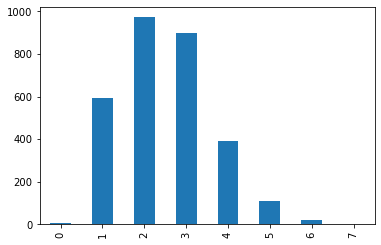

In [37]:
number_genres = train.genres.copy(deep=True)
train['number_of_genres'] = number_genres.apply(lambda x: len(x) if not type(x) == float else 0)
count_genres = train.number_of_genres.value_counts(ascending=True).sort_index()
print(count_genres)

count_genres.plot.bar()

Let's create our binary features next. Complete the following steps:
 
1.   Transform the `genres` column by replacing its current entries with the list of names of genres occurring in the entries.  For example, the entry 
```
[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]
```
should be transformed into:
```
['Romance','Comedy']
```
Empty entries should be transformed into the empty list `[]`.

2. Create a separate column (in `train`) for each of the 20 genres, with name `genres_(nameofgenre)` (e.g. `genres_Comedy`). A movie should have a 1 on a genres column if the genre is one of the associated genres for that movie, and a 0 otherwise.
    * To get started, consider what operations create a data frame with dimensions as `train` and columns as specified here, based on the list output from step 1. Then combine this data frame with `train`.

You have to use Pandas built-in functions only (no explicit looping).

In [38]:
# your code goes here
def from_genre_dict_to_list(list_of_dicts):

  return [dictionary['name'] for dictionary in list_of_dicts]

def binary_columns (df):
  genre_counts = df['genres'].explode().value_counts()
  for genre in genre_counts.keys():
    # column = np.where(list(df['genres']).count(genre)!= 0 , 1, 0)
    # this would be the best way but I can't seem to do it
    genres_copy = df['genres'].copy(deep = True)
    df[('genres_' + genre)] = genres_copy.apply(lambda x: 1 if genre in x else 0)

  return df, genre_counts

genres = train.genres.copy(deep=True)
train['genres'] = genres.apply(lambda x: from_genre_dict_to_list(x) if not type(x) == float else []) 
train, genre_counts = binary_columns(train)
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,number_of_genres,genres_Drama,genres_Comedy,genres_Thriller,genres_Action,genres_Romance,genres_Crime,genres_Adventure,genres_Horror,genres_Science Fiction,genres_Family,genres_Fantasy,genres_Mystery,genres_Animation,genres_History,genres_Music,genres_War,genres_Documentary,genres_Western,genres_Foreign,genres_TV Movie
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,[Comedy],NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[Comedy, Drama, Family, Romance]",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,4,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,NaN,3300000,[Drama],http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,NaN,1200000,"[Thriller, Drama]",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,NaN,0,"[Action, Thriller]",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Visualise the number of movies per top 20 genre with a chart of your choice.

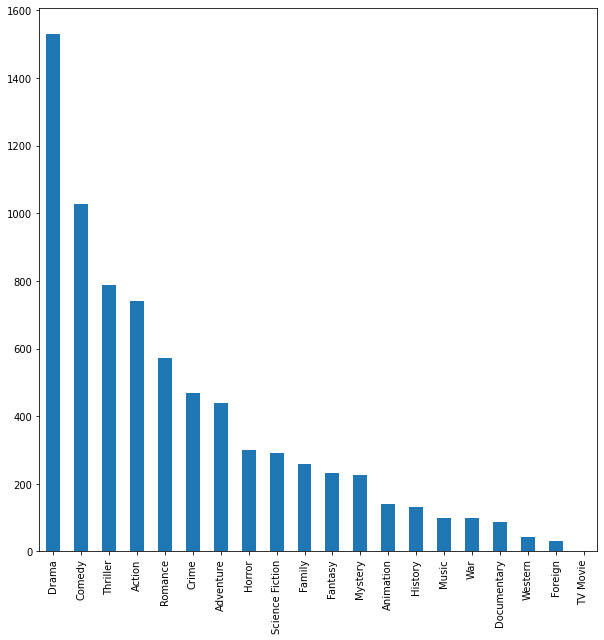

In [39]:
# your code goes here
genre_counts.plot.bar(figsize=(10,10))

## Part 2: Adding more binary features

We've now extracted binary features for all genres associated with a movie. But there's other information that we could use to base our predictions on. 

The `genres` column is just one out of several columns containing lists of dictionaries as entries. For example, the `production_companies` column also contains lists of dictionaries, providing names of the companies producing the movie. As you just did with genres, add new columns for:
 
1.   The names of the 30 most common production companies
2.   The names of the 30 most common production countries
3.   The names of the 30 most common actors (`cast` column) 
4.   The names of the 30 most common crew members
5.   The names of the 30 most common keywords
 
We recommend you generalize the functionality implemented in the previous question (e.g. to other columns and to restrict to top 30 most common values).

In [40]:
# PART OF CODE WHERE LIST OF DICTIONARIES IS SUBSTITUTED WITH LIST OF NAMES OF COMPANIES (should only be run once)

def from_genre_dict_to_list(list_of_dicts):

  return [dictionary['name'] for dictionary in list_of_dicts]

columns = ['production_companies','production_countries', 'Keywords', 'cast', 'crew']
genres = train.genres.copy(deep=True)
train[columns] = train[columns].applymap(lambda x: from_genre_dict_to_list(x) if not type(x) == float else []) 

# PART OF CODE NECESSARY TO FIND THE 30 MOST COMMON IN A COLUMN
def get_top_n(df,list_of_columns,n):
  top_n = {}
  for column in list_of_columns:
    ocurrence_in_list_of_values = pd.Series([x for item in train[column] for x in item]).value_counts()
    top_n[column] = ocurrence_in_list_of_values[:n].index.tolist()

  return top_n
top_30 = get_top_n(train, columns, 30)

# NOW THAT WE HAVE THE MOST COMMON VALUES IN EACH COLUMN WE CAN CREATE BINARY COLUMNS FOR EACH
def binary_columns (df, top):
  for column in top:
    for value in top[column]:
      # column = np.where(list(df['genres']).count(genre)!= 0 , 1, 0)
      # this would be the best way but I can't seem to do it
      column_copy = df[column].copy(deep = True)
      df[(column + '_' + value)] = column_copy.apply(lambda x: 1 if value in x else 0)

  return df

train = binary_columns(train, top_30)

Check the result. You should now have a much wider table, with the new columns consisting of binary features.

In [41]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,number_of_genres,genres_Drama,genres_Comedy,genres_Thriller,genres_Action,genres_Romance,genres_Crime,genres_Adventure,genres_Horror,genres_Science Fiction,genres_Family,genres_Fantasy,genres_Mystery,genres_Animation,genres_History,genres_Music,genres_War,...,cast_Michael Caine,cast_Matt Damon,cast_George Clooney,cast_Frank Welker,cast_Richard Jenkins,cast_Ed Harris,cast_Dennis Quaid,cast_Denzel Washington,cast_Robert Duvall,cast_Kevin Bacon,crew_Avy Kaufman,crew_Robert Rodriguez,crew_Deborah Aquila,crew_James Newton Howard,crew_Mary Vernieu,crew_Luc Besson,crew_Jerry Goldsmith,crew_Steven Spielberg,crew_Francine Maisler,crew_Tricia Wood,crew_James Horner,crew_Kerry Barden,crew_Janet Hirshenson,crew_Bob Weinstein,crew_Harvey Weinstein,crew_Jane Jenkins,crew_Francis Ford Coppola,crew_John Papsidera,crew_Hans Zimmer,crew_John Debney,crew_Mindy Marin,crew_Danny Elfman,crew_Billy Hopkins,crew_Mark Isham,crew_Tim Bevan,crew_Sarah Finn,crew_Neal H. Moritz,crew_Hans Bjerno,crew_Alan Silvestri,crew_Dan O'Connell
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,[Comedy],NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...","[Kelly Cantley, Steve Pink, Josh Heald, Josh H...",12314651,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[Comedy, Drama, Family, Romance]",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,[Walt Disney Pictures],[United States of America],8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[Garry Marshall, Charles Minsky, John Debney, ...",95149435,4,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,NaN,3300000,[Drama],http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...","[Terri Taylor, Richard Henderson, Jeffrey Stot...",13092000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,NaN,1200000,"[Thriller, Drama]",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,[],[India],3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[mystery, bollywood, police corruption, crime,...","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...","[Sujoy Ghosh, Sujoy Ghosh, Sujoy Ghosh]",16000000,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,NaN,0,"[Action, Thriller]",NaN,tt1380152,ko,마린보이,Marine Boy is the story of

 ## Part 3: Adding numerical date features

Next, we'll create some features based on the release date information. Create a new column storing the value for each of the following  aspects of a release date:
 
```
['year', 'weekday', 'month', 'weekofyear', 'day', 'quarter']
```
 
As usual, don't iterate explicitly to create these columns.

In [42]:
train['release_date']= pd.to_datetime(train['release_date'], errors="coerce")
train['year'] = train['release_date'].dt.year
train['weekday'] = train['release_date'].dt.weekday
train['month'] = train['release_date'].dt.month
train['day'] = train['release_date'].dt.day
train['weekofyear'] = train['release_date'].dt.isocalendar().week
train['quarter'] = train['month'].apply(lambda x: (x-1)//3)


Next, we'll drop the columns that will not be used for learning. 

In [43]:
train = train.drop(['id', 'homepage', 'original_language',
                    'title', 'imdb_id','crew', 'poster_path', 
                    'release_date', 'status', 'belongs_to_collection',
                    'Keywords', 'original_title', 'overview',
                    'production_companies', 'production_countries', 
                    'spoken_languages', 'tagline', 'cast','genres'], 
                   axis=1)

Lastly, drop any rows with missing values.

In [44]:
train = train.dropna()

## Part 4: Prediction

Let's load the necessary `sklearn` libraries and prepare the training data for learning. Recall that your goal is to predict whether a movie has science fiction as an associated genre. So you're dealing with a binary classification task.

In [45]:
from sklearn.model_selection import train_test_split

Use `sklearn` to prepare the training and test sets, setting aside 15% of the data for testing. Call the training input features, training labels, test input features and test labels as follows:

```
x_train, x_test, y_train, y_test
```



In [46]:
X = train.loc[:, train.columns != 'genres_Science Fiction'] 
y =  train['genres_Science Fiction']
x_train, x_test, y_train, y_test = train_test_split(X , y, test_size = 0.15)

Feature scaling is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). Run the following code to feature scale your input data.

In [47]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)  
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test)

Check that the shape of your data looks correct.

In [48]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(2548, 180) (2548,)
(450, 180) (450,)


Train a classifier of your choice. Then report results:
* Display the confusion matrix over the test set in absolute numbers.
    * These numbers reflect number of true positives, true negatives, false positives and false negatives.
* Display a normalized confusion matrix over the test set, so [sensitivity and specificity](https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers) can be read from the diagonal (off-diagonal will contain type I and type II error rates).
    * Note that sensitivity is recall for the positive class (1), whereas specificity is recall for the negative class (0).
* State **in free-text** the sensitivity and specificity of your classifier.

0.9088888888888889


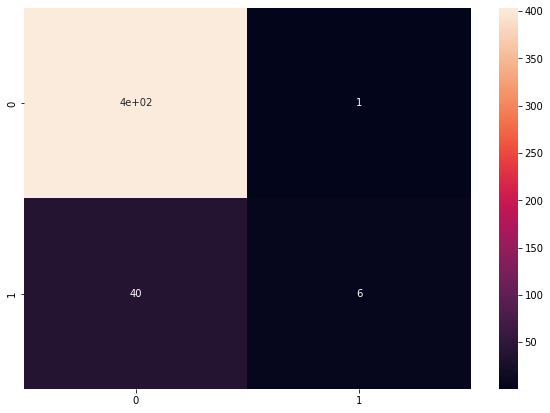

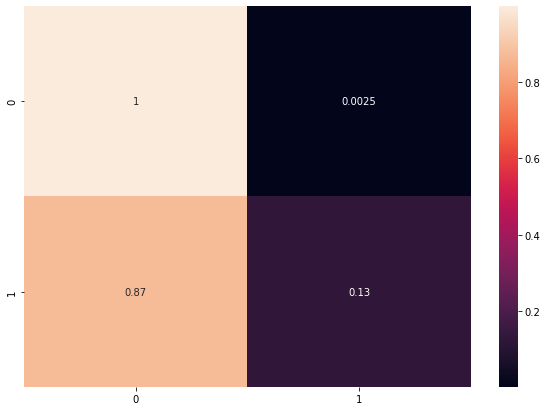

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sn

clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# ABSOLUTE NUMBERS CONFUSION MATRIX
cfm = confusion_matrix(y_test, y_pred)
df_cfm = pd.DataFrame(cfm, index = [0,1], columns = [0,1])
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True)
cfm_plot.figure.savefig("cfm.png")

# NORMALIZED CONFUSION MATRIX
cfm_norm = confusion_matrix(y_test, y_pred, normalize = 'true')
df_cfm_norm = pd.DataFrame(cfm_norm, index = [0,1], columns = [0,1])
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm_norm, annot=True)
cfm_plot.figure.savefig("cfm.png")


SPECIFICITY = 1

SENSITIVITY = 0.25

We can clearly see that our model resorts to simply guessing more often that it is not a 'Science Fiction' movie, as this gives a very high accuracy because the percentage of movies which are Science Fiction is very small. 

This model is clearly not working very well, so I will try to make another below

0.9955555555555555


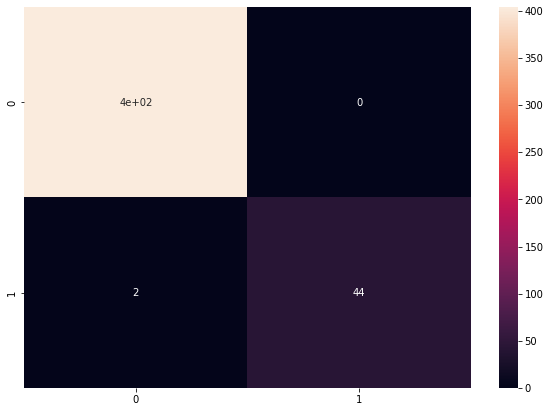

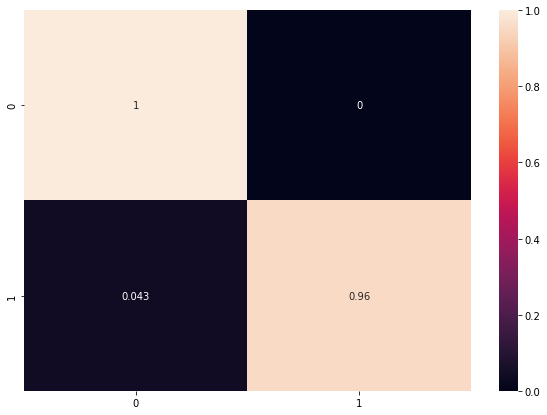

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators = 250)
ada.fit(x_train, y_train)
y_pred = ada.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# ABSOLUTE NUMBERS CONFUSION MATRIX
cfm = confusion_matrix(y_test, y_pred)
df_cfm = pd.DataFrame(cfm, index = [0,1], columns = [0,1])
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True)
cfm_plot.figure.savefig("cfm.png")

# NORMALIZED CONFUSION MATRIX
cfm_norm = confusion_matrix(y_test, y_pred, normalize = 'true')
df_cfm_norm = pd.DataFrame(cfm_norm, index = [0,1], columns = [0,1])
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm_norm, annot=True)
cfm_plot.figure.savefig("cfm.png")

Now I'd say that's a bit better :) SENSITIVITY = 1SPECIFICITY = 1! I used two ensemble methods as out data is clearly imbalanced and hence Adaboost works great as building multiple trees where are better able to compensate for disparity in data percentages.

Sensitivity and Specificity may be different depending on the results of when we run the notebook for the last time but in general all conclusions will still stand.

## Part 5: Prediction with less leakage

From Wikipedia, [data leakage](https://en.wikipedia.org/wiki/Leakage_(machine_learning)) is the use of information in the model training process which would not be expected to be available at prediction time, causing the predictive scores (metrics) to overestimate the model's utility when run in a production environment.

Feature or column-wise leakage is caused by the inclusion of columns which are one of the following: a duplicate label, a proxy for the label, or the label itself

Considering we're doing binary classification of whether a movie is science fiction, identify the most prominent cause of feature leakage among the features added during Exercise 3. 


If I were to guess which columns are the main reason for data leakage it would definitely be the other movie_genre binary columns which we created and the column which states how many genres the movie has. The model is clearly able to utilize this information and simply understand if a genre is "missing" and in that case it has to be "Science Fiction".

As we can see the performance with the same parameters utilized before is much worse, namely:

ACCURACY : 0.90666

SENSITIVITY: 0.25

SPECIFICITY = 0.98

We can see a performance much more similar to that of the first classifier trained in Part 4 as expecting a movie to not belong to the category gives a higher accuracy. This can also be seen by the distribution of the mis-classifications

0.9266666666666666


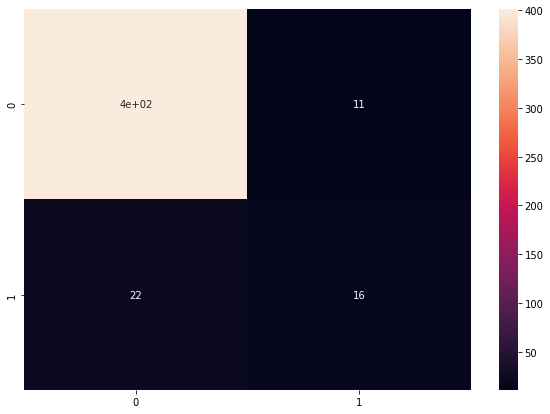

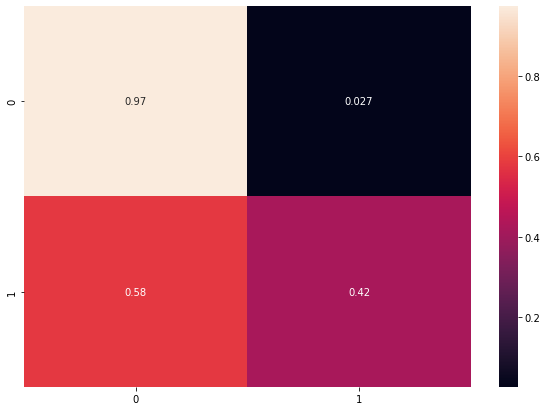

In [51]:
# WE DROP ALL COLUMNS WHICH CONTAIN genres_ in the name, which is fairly secure, and number_of_genres
# We also retrieve y
X = X[X.columns.drop(list(X.filter(regex='genres_')))]
y =  train['genres_Science Fiction']
x_train, x_test, y_train, y_test = train_test_split(X , y, test_size = 0.15)

#NORMALIZING
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)  
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test)

#MODEL AND CONFUSION MATRICES
# your code goes here
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators = 250)
ada.fit(x_train, y_train)
y_pred = ada.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# ABSOLUTE NUMBERS CONFUSION MATRIX
cfm = confusion_matrix(y_test, y_pred)
df_cfm = pd.DataFrame(cfm, index = [0,1], columns = [0,1])
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True)
cfm_plot.figure.savefig("cfm.png")

# NORMALIZED CONFUSION MATRIX
cfm_norm = confusion_matrix(y_test, y_pred, normalize = 'true')
df_cfm_norm = pd.DataFrame(cfm_norm, index = [0,1], columns = [0,1])
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm_norm, annot=True)
cfm_plot.figure.savefig("cfm.png")


# Section 4: Basic movie recommendation system

In this exercise, we'll build a simple movie recommendation system.  The system will take a movie as input and recommend a list of similar movies. In order to recommend similar movies, you will use the correlation between the ratings of movies as a similarity metric. We'll use Pearson's correlation. 
 
The data for this exercise is available in the following URLs. It contains basic info about movies, as well as ratings provided by several users.

In [52]:
import pandas as pd
url1 = 'http://courses.compute.dtu.dk/02807/2021/projects/project1/ratings.csv'
url2 = 'http://courses.compute.dtu.dk/02807/2021/projects/project1/movies.csv'

## Part 1: Preparing the ratings data

Read the data from these two URLs, and create a single dataframe from them, with the following columns:

| userId | movieId | rating | timestamp | title | genres |
|--------|---------|--------|-----------|-------|--------|
|        |         |        |           |       |        |

Call the dataframe `movie_data`.

In [53]:
movie_data1 = pd.read_csv(url1)
movie_data2 = pd.read_csv(url2)

movie_data = pd.merge(movie_data1, movie_data2, on='movieId',how='left')
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


To find the correlation between the ratings of movies, create a dataframe where each column is a movie name and each row contains the rating assigned by a specific user to that movie. 

You'll notice that this dataframe has many NaN values, since each movie is not rated by every user. Call the dataframe `user_ratings`.

In [54]:
#each column is movie name
#each row has the rating
user_ratings = movie_data.drop(columns= ['movieId', 'timestamp', 'genres'])
user_ratings

,userId,rating,title
0,1,4.0,Toy Story (1995)
1,1,4.0,Grumpier Old Men (1995)
2,1,4.0,Heat (1995)
3,1,5.0,Seven (a.k.a. Se7en) (1995)
4,1,5.0,"Usual Suspects, The (1995)"
...,...,...,...
100831,610,4.0,Split (2017)
100832,610,5.0,John Wick: Chapter Two (2017)
100833,610,5.0,Get Out (2017)
100834,610,5.0,Logan (2017)


In [55]:
user_ratings = pd.pivot_table(user_ratings,values ='rating', index=['userId'], columns=['title'])
user_ratings

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...All the Marbles (1981),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),10 (1979),10 Cent Pistol (2015),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),100 Streets (2016),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Dalmatians II: Patch's London Adventure (2003),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)","10th Victim, The (La decima vittima) (1965)","11'09""01 - September 11 (2002)",11:14 (2003),"11th Hour, The (2007)",12 Angry Men (1957),12 Angry Men (1997),12 Chairs (1971),12 Chairs (1976),12 Rounds (2009),12 Years a Slave (2013),...,Zathura (2005),Zatoichi and the Chest of Gold (Zatôichi senryô-kubi) (Zatôichi 6) (1964),Zazie dans le métro (1960),Zebraman (2004),"Zed & Two Noughts, A (1985)",Zeitgeist: Addendum (2008),Zeitgeist: Moving Forward (2011),Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zero Effect (1998),"Zero Theorem, The (2013)",Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Zipper (2015),Zodiac (2007),Zombeavers (2014),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Strippers! (2008),Zombieland (2009),Zone 39 (1997),"Zone, The (La Zona) (2007)",Zookeeper (2011),Zoolander (2001),Zoolander 2 (2016),Zoom (2006),Zoom (2015),Zootopia (2016),Zulu (1964),Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

## Part 2: Finding the most similar movies

Each column contains all the user ratings for a particular movie. Let's take the user ratings for the movie Toy Story.

In [56]:
toystory_ratings = user_ratings['Toy Story (1995)']
toystory_ratings

userId
1      4.0
2      NaN
3      NaN
4      NaN
5      4.0
      ... 
606    2.5
607    4.0
608    2.5
609    3.0
610    5.0
Name: Toy Story (1995), Length: 610, dtype: float64

Next, find the correlation between the user ratings for Toy Story and the user ratings of all other movies. 
 
More specifically, create a dataframe that contains two columns, called `title` and `Correlation`. Each row should contain a movie title $x$, followed by the pairwise correlation between the column of ratings for Toy Story and the column of ratings for $x$.  Drop any rows with null values, and display the resulting dataframe.
 
Use built-in functions to compute correlations and avoid explicit loops.

In [57]:
movie_corr = user_ratings.corr()['Toy Story (1995)']
movie_corr.columns = ['title', 'Correlation']
len(movie_corr)
movie_corr = movie_corr.dropna()
movie_corr = pd.DataFrame(movie_corr)
movie_corr['title'] = movie_corr.index
movie_corr = movie_corr.rename(columns={'Toy Story (1995)': 'Correlation'})
movie_corr.reset_index(drop= True , inplace=True)
movie_corr

,Correlation,title
0,0.240563,"'burbs, The (1989)"
1,0.353833,(500) Days of Summer (2009)
2,-0.427425,*batteries not included (1987)
3,1.000000,10 Cent Pistol (2015)
4,-0.285732,10 Cloverfield Lane (2016)
...,...,...
4762,0.129185,[REC] (2007)
4763,0.333282,eXistenZ (1999)
4764,-0.244733,xXx (2002)
4765,0.129969,xXx: State of the Union (2005)


Sort the movies by descending order of correlation to find out highly correlated movies at the top. Display the 5 most highly correlated movies.


In [58]:
movie_corr = movie_corr.sort_values(by=['Correlation'], ascending=False)
movie_corr

,Correlation,title
4750,1.0,Zathura (2005)
4470,1.0,Uptown Girls (2003)
2383,1.0,Land Before Time III: The Time of the Great Gi...
415,1.0,Beautiful People (1999)
1716,1.0,Goon (2011)
...,...,...
450,-1.0,"Best Offer, The (Migliore offerta, La) (2013)"
1523,-1.0,"Forbidden Kingdom, The (2008)"
3570,-1.0,Rollercoaster (1977)
2355,-1.0,Kull the Conqueror (1997)


If you computed correlations correctly, you will find that the recommended movies are not very well known. We can generate more popular recommendations by finding highly correlated movies that have a sensible number of ratings. 
 
Add a column to your correlation table, called `rating_counts`, which stores the number of ratings received by each movie.

In [59]:
rating_counts = movie_data.drop(columns= ['movieId', 'timestamp', 'genres'])
rating_counts = rating_counts.groupby(['title']).size()
rating_counts.sort_values(ascending=False)

rating_counts = pd.DataFrame(rating_counts)
rating_counts['title'] = rating_counts.index
rating_counts = rating_counts.reset_index(drop=True)
movie_corr = pd.concat([movie_corr, rating_counts], axis=1)
movie_corr = movie_corr.rename(columns={0: 'rating_count'})

movie_corr = movie_corr.loc[:,~movie_corr.columns.duplicated()]
movie_corr = movie_corr.dropna()

movie_corr.head(7)

,Correlation,title,rating_count
0,0.240563,"'burbs, The (1989)",1
1,0.353833,(500) Days of Summer (2009),1
2,-0.427425,*batteries not included (1987),2
3,1.000000,10 Cent Pistol (2015),1
4,-0.285732,10 Cloverfield Lane (2016),2
5,-1.000000,10 Items or Less (2006),1
6,0.322741,10 Things I Hate About You (1999),17


Now find the 5 movies with the highest correlation with Toy Story, which have strictly more than 100 ratings. Display the result below. 

In [60]:
movie_corr = movie_corr[movie_corr.rating_count > 100].sort_values(by=['Correlation'], ascending=False)

display(movie_corr.head(7))

print('The 5 movies with the highest correlation with Toy Story and having more than 100 ratings are: ')
print(movie_corr['title'].head(5))

,Correlation,title,rating_count
4738,1.000000,Young Adult (2011),110
3794,1.000000,Shut Up & Sing (2006),107
2619,1.000000,"Man Apart, A (2003)",133
2043,1.000000,I Saw the Devil (Akmareul boatda) (2010),103
4645,1.000000,Why Him? (2016),110
333,0.970725,"Babysitter, The (1995)",126
4323,0.944911,Tomb Raider (2018),143


The 5 movies with the highest correlation with Toy Story and having more than 100 ratings are: 
4738                          Young Adult (2011)
3794                       Shut Up & Sing (2006)
2619                         Man Apart, A (2003)
2043    I Saw the Devil (Akmareul boatda) (2010)
4645                             Why Him? (2016)
Name: title, dtype: object
